# **1. Setup and Library**

In [18]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import nltk

!pip install pandas numpy scikit-learn nltk
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
print("Setup complete.")

Setup complete.


I started by importing all the necessary libraries and modules for data handling and machine learning

I installed the necessary packages and ensured NLTK data was downloaded to prepare

# **2.Data Loading and Initial Preparation**

In [24]:
file_path_zip = '/content/fake_or_real_news.csv.zip'
file_path_csv = 'fake_or_real_news.csv'

!unzip -o {file_path_zip}

try:
    df = pd.read_csv(file_path_csv)
    print(f"Data loaded from {file_path_csv}. Shape: {df.shape}")
except FileNotFoundError:
    print(f"ERROR: File not found at '{file_path_csv}'.")
    raise

df['full_content'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df['label'] = df['label'].apply(lambda x: 1 if x == 'REAL' else 0)
print(f"Target variable distribution (0=FAKE, 1=REAL):\n{df['label'].value_counts()}")

Archive:  /content/fake_or_real_news.csv.zip
  inflating: fake_or_real_news.csv   
Data loaded from fake_or_real_news.csv. Shape: (6335, 4)
Target variable distribution (0=FAKE, 1=REAL):
label
1    3171
0    3164
Name: count, dtype: int64


I combined the title and text into one column to create a better feature

I converted the target labels to binary numbers (1 for REAL, 0 for FAKE)

# **3. Text Preprocessing and Data Split**

In [25]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = [word for word in word_tokenize(text) if word not in stop_words]
    return " ".join(tokens)

df['cleaned_content'] = df['full_content'].apply(preprocess_text)
print("Text Preprocessing Applied.")

X = df['cleaned_content']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training set size: {X_train.shape[0]} samples")

Text Preprocessing Applied.
Training set size: 5068 samples


I started by lowercasing everything for standardization

I removed links and URLs

I removed punctuation to reduce noise

I tokenized and filtered out common stop words

I split the data 80% for training and 20% for testing

# **4.Model Pipeline Definition and Training**

In [21]:
model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_df=0.8,
        ngram_range=(1, 2)
    )),
    ('clf', PassiveAggressiveClassifier(
        max_iter=50,
        random_state=42,
        C=0.5
    ))
])

print("Starting model training...")
model_pipeline.fit(X_train, y_train)
print("Model training complete.")

Starting model training...
Model training complete.


I added bigrams to the unigrams for better context

I chose the Passive Aggressive Classifier because it trains quickly and efficiently

I trained the entire pipeline with the training data

# **5.Model Evaluation and Confusion Matrix Visualization**


--- Model Performance Metrics ---
Accuracy: 0.9432

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.96      0.93      0.94       628
        REAL       0.93      0.96      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



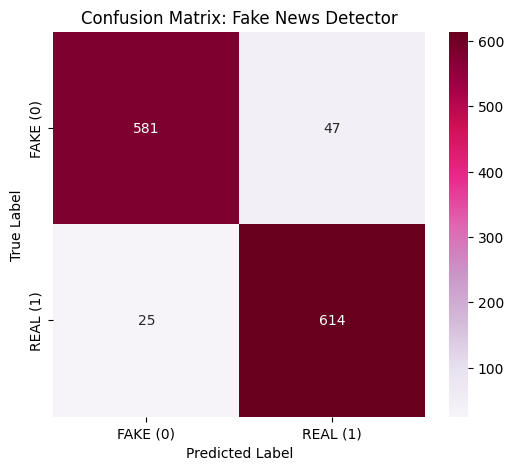

In [26]:
y_pred = model_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['FAKE', 'REAL'])

print(f"\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuRd',
            xticklabels=['FAKE (0)', 'REAL (1)'], yticklabels=['FAKE (0)', 'REAL (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Fake News Detector')
plt.show()

I am reporting all key metrics: Precision, Recall, and F1-score

I visualized the errors using the Confusion Matrix with the PuRd color map

# **6.Model Persistence and Mitigation Score Generation**

In [27]:
model_filename = 'fake_news_detector_pipeline.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model_pipeline, file)
print(f"\nModel successfully saved as {model_filename}")

example_article = ["Breaking news: Scientists confirm dogs can talk, but only to presidents."]
confidence_score = model_pipeline.decision_function(example_article)[0]

print("\n--- Mitigation Focus (Confidence Score) ---")
print(f"Example Article Prediction Score: {confidence_score:.4f}")


Model successfully saved as fake_news_detector_pipeline.pkl

--- Mitigation Focus (Confidence Score) ---
Example Article Prediction Score: -0.9352


I saved the entire trained model pipeline for future deployment

I generated the raw confidence score for ethical analysis

